In [2]:
#rm(list=ls())
setwd("/Users/peterwu/Dropbox/OMP\ shared/peter_wu/1st_paper_nichols_reanalysis/github/Systematic-analyses-ecoli-phenotypes/Nichols_data_mining_code/")
source("Nichols_preload.R")

## Sensitivity & precision graphs

### Definitions

In [3]:
#functions to get confusion matrix based on annot and similarity
get_confusionMatrix=function(table_,annot,similarity,seed=9){   
    df=table_[,c(annot,similarity)]
        if(length(annot)>=2){
            coannotation=(rowSums(df[,annot])>=1)
            #coannotation=(rowSums(df[,annot])>=length(annot)) this is A&B&...
            cumsum_=cumsum(coannotation[order(df[,similarity],decreasing=T)])
            return(confusionMatrix_metrics(cumsum_,seed=seed))
        } 
    
    cumsum_=cumsum(df[,annot][order(df[,similarity],decreasing=T)])
    return(confusionMatrix_metrics(cumsum_,seed=seed))
}

In [4]:
df=strain1strain2_allAnnotations_allSimilarities

## Quantitative VS discretized data based on various FDRs

In [20]:
#load the required data
setwd("/Users/peterwu/Dropbox/OMP\ shared/peter_wu/1st_paper_nichols_reanalysis/github/Systematic-analyses-ecoli-phenotypes/Nichols_data_mining_code/new_exps/diff_bins_by_many_FDR")

load("mi_ternary_5_bin.RData")
mi_ternary_5_bin=mi_ternary
load("mi_ternary_7_bin.RData")
mi_ternary_7_bin=mi_ternary
load("mi_ternary_9_bin.RData")
mi_ternary_9_bin=mi_ternary

df2=data.frame(df,
               mi_ternary_5_bin=mi_ternary_5_bin[[3]],
               mi_ternary_7_bin=mi_ternary_7_bin[[3]],
               mi_ternary_9_bin=mi_ternary_9_bin[[3]]
              ) #the order of the strain pairs allows me to use data.frame (or cbind)

In [51]:
#This gets precison using the same combination of annotations as the violin plots
subset=5000

#precalculate and subset to prevent memory problem
con1=get_confusionMatrix(df2,c("pwy","pcomplex","operon","regulon","kegg_modules"),"mi",seed=1009)[1:subset,]
con2=get_confusionMatrix(df2,c("pwy","pcomplex","operon","regulon","kegg_modules"),"mi_ternary",seed=1009)[1:subset,]


con3=get_confusionMatrix(df2,c("pwy","pcomplex","operon","regulon","kegg_modules"),"mi_ternary_5_bin",seed=1009)[1:subset,]
con4=get_confusionMatrix(df2,c("pwy","pcomplex","operon","regulon","kegg_modules"),"mi_ternary_7_bin",seed=1009)[1:subset,]
con5=get_confusionMatrix(df2,c("pwy","pcomplex","operon","regulon","kegg_modules"),"mi_ternary_9_bin",seed=1009)[1:subset,]


annot_list=list(con1,con2,con3,con4,con5)
names(annot_list)=c("Quantitative","Ternary (3 bins)",
                    "Discretized 5 bins",
                    "Discretized 7 bins",
                    "Discretized 9 bins"
                   )

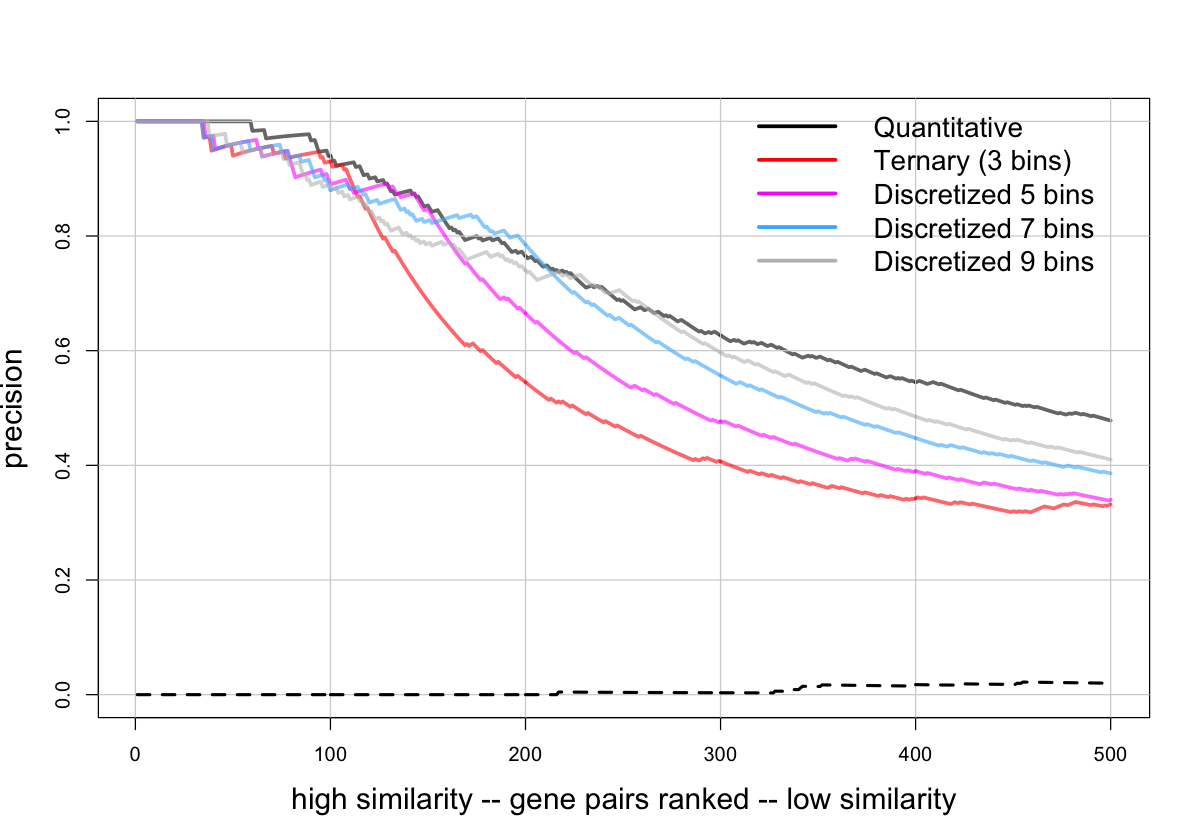

In [52]:
samples=1:500
cols=c("black","red","magenta","#45B6FE","grey")
##colors are assigned based on the alphabetial order of the legend, but deleting the legend doesn't change the order.
##Is it because the names of the list are read even without adding the legend? 
alpha=0.6


metric="precision"
random_metric=paste0("random_",metric)
x_lab="high similarity -- gene pairs ranked -- low similarity"
y=metric
ylim=c(0,1)
xlim=c(1,max(samples))
lwd=3

options(repr.plot.width = 10, repr.plot.height = 7)


for(i in seq(annot_list)){
    if(i==1){
      plot(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,type='l',col=alpha(cols[i],alpha),
           ylim=ylim,xlim=xlim,lwd = lwd, cex.lab=1.5) 
    grid(lty='solid')
    }else{
      lines(samples,annot_list[[i]][[metric]][samples],xlab=x_lab,ylab=metric,col=alpha(cols[i],alpha),lwd = lwd) 
    }
    

}

legend(300, 1.05, legend=names(annot_list),
       col=cols, lty=1,lwd = lwd, cex=1.4, box.lty=0) 

#add the negative control
lines(samples,annot_list[[1]][[random_metric]][samples],col='black',lty = 'dashed',lwd=2.5)